## Correlation Analysis Across ETFs

We calculate the pairwise correlation matrix for the historical daily log returns of the ETFs.
Then we visualize the full correlation matrix as a heatmap.
Next, we extract the upper-triangular (pairwise) correlations, plot their histogram, and finally bin these correlations into low, medium, and high categories and display a count plot.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

In [46]:
# Define ETFs and download historical adjusted close data
etfs = ["SPY", "XLU", "IGV", "SMH", "ARKK", "XLE", "QQQ", "XLK"]
start_date = "2020-01-01"
end_date = "2024-12-31"
data = yf.download(etfs, start=start_date, end=end_date, auto_adjust=False)["Adj Close"]

[*********************100%***********************]  8 of 8 completed


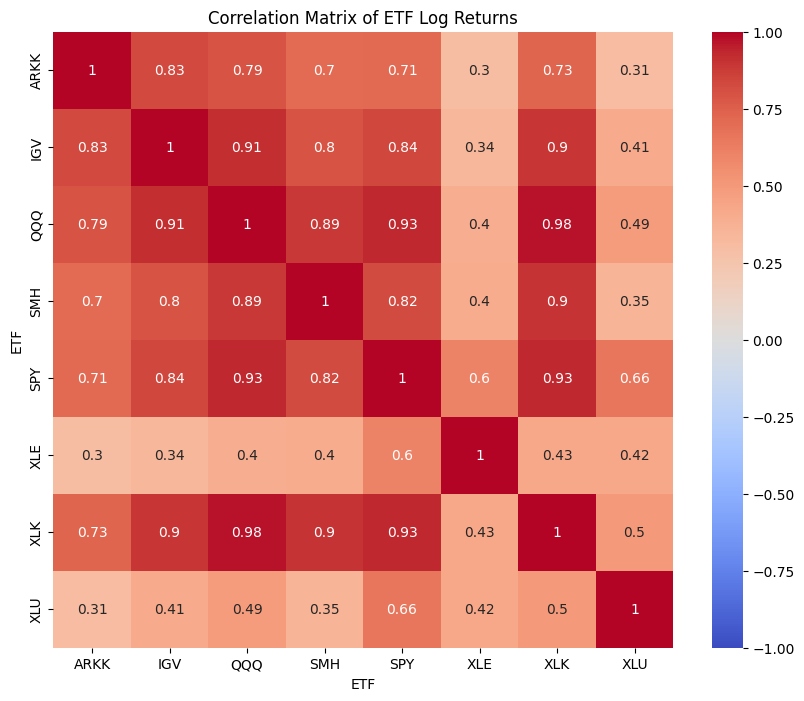

In [47]:
# Compute daily log returns if not already computed
log_returns = np.log(data / data.shift(1)).dropna()

# Compute the full correlation matrix
corr_matrix = log_returns.corr()

# Plot the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of ETF Log Returns")
plt.xlabel("ETF")
plt.ylabel("ETF")
plt.show()

In [44]:
# Extract pairwise correlations (upper triangular only)
mask = np.triu(np.ones(corr_matrix.shape, dtype=bool), k=1)

# Extract pairwise correlations without relying on .reset_index()
pairwise_corr = corr_matrix.where(mask).stack()

# Force index renaming to remove the conflicting 'Ticker'
pairwise_corr.index = pairwise_corr.index.set_names(['ETF1', 'ETF2'])

# Convert to DataFrame and rename the correlation column
pairwise_corr_df = pairwise_corr.reset_index().rename(columns={0: 'Correlation'})

print("Pairwise Correlations:")
print(pairwise_corr_df)

Pairwise Correlations:
    ETF1 ETF2  Correlation
0   ARKK  IGV     0.822020
1   ARKK  QQQ     0.787791
2   ARKK  SMH     0.665721
3   ARKK  SPY     0.723385
4   ARKK  XLE     0.184741
5   ARKK  XLK     0.710547
6   ARKK  XLU     0.213776
7    IGV  QQQ     0.900452
8    IGV  SMH     0.765485
9    IGV  SPY     0.841612
10   IGV  XLE     0.196981
11   IGV  XLK     0.879495
12   IGV  XLU     0.255171
13   QQQ  SMH     0.881153
14   QQQ  SPY     0.940304
15   QQQ  XLE     0.235870
16   QQQ  XLK     0.970846
17   QQQ  XLU     0.314474
18   SMH  SPY     0.807354
19   SMH  XLE     0.238405
20   SMH  XLK     0.902703
21   SMH  XLU     0.157487
22   SPY  XLE     0.411259
23   SPY  XLK     0.922865
24   SPY  XLU     0.472903
25   XLE  XLK     0.238433
26   XLE  XLU     0.216916
27   XLK  XLU     0.292705


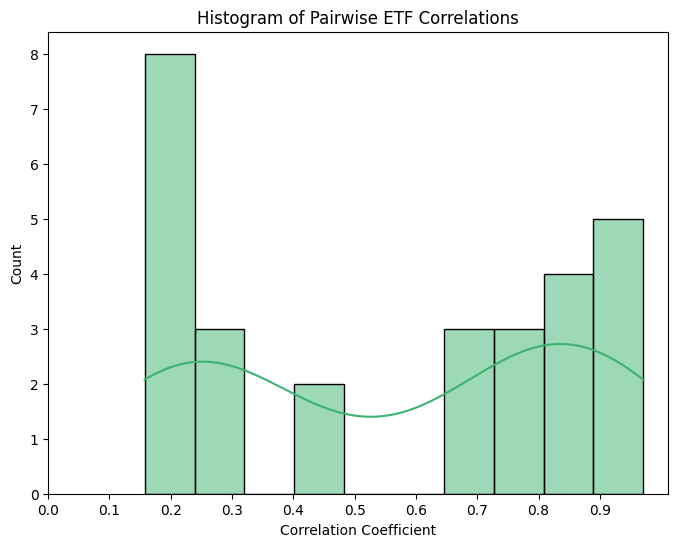

In [45]:
# Plot a histogram of the pairwise correlation coefficients
plt.figure(figsize=(8,6))
sns.histplot(pairwise_corr_df['Correlation'], bins=10, kde=True, color='mediumseagreen')
plt.title("Histogram of Pairwise ETF Correlations")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Count")
# y from 0 to 1 in 0.1 steps
plt.xticks(np.arange(0, 1, 0.1))
plt.show()


Binned Correlation Counts:
Corr_Bin
Low (<0.3)           0
Medium (0.3-0.7)    13
High (>0.7)         15
Name: count, dtype: int64


/var/folders/lw/9t5ytb2d3xs243fmlzf16znr0000gn/T/ipykernel_62559/162558776.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Corr_Bin', data=pairwise_corr_df, order=labels, palette='viridis')


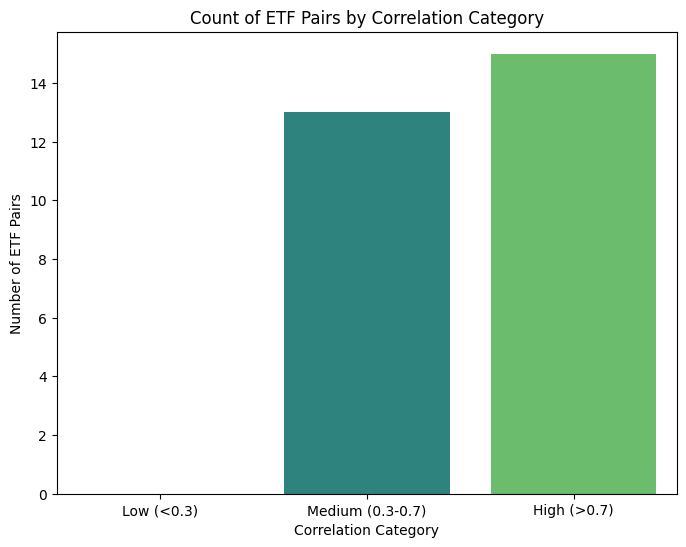

In [18]:
# Bin the correlation coefficients into three categories:
# Low: < 0.3, Medium: 0.3 to 0.7, High: > 0.7
bins = [-1, 0.3, 0.7, 1]
labels = ['Low (<0.3)', 'Medium (0.3-0.7)', 'High (>0.7)']
pairwise_corr_df['Corr_Bin'] = pd.cut(pairwise_corr_df['Correlation'], bins=bins, labels=labels)

# Display the count of each bin
bin_counts = pairwise_corr_df['Corr_Bin'].value_counts().sort_index()
print("\nBinned Correlation Counts:")
print(bin_counts)

# Plot a count plot for the binned correlations
plt.figure(figsize=(8,6))
sns.countplot(x='Corr_Bin', data=pairwise_corr_df, order=labels, palette='viridis')
plt.title("Count of ETF Pairs by Correlation Category")
plt.xlabel("Correlation Category")
plt.ylabel("Number of ETF Pairs")
plt.show()